In [1]:
import pandas as pd

airbnbb = pd.read_csv(r"C:\Users\antho\OneDrive\Υπολογιστής\Ανθούλα\projects\python\Airbnb project\barcelona_airbnb.csv")
airbnbm = pd.read_csv(r"C:\Users\antho\OneDrive\Υπολογιστής\Ανθούλα\projects\python\Airbnb project\madrid_airbnb.csv")

In [2]:
airbnbb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,17475,Rental unit in 08013 Barcelona · ★4.40 · 1 bed...,65623,Luca,Eixample,la Dreta de l'Eixample,41.399390,2.170440,Entire home/apt,140.0,5,26,2023-12-04,0.16,1,32,9,NaN
1,18674,Rental unit in Barcelona · ★4.33 · 3 bedrooms ...,71615,Mireia Maria,Eixample,la Sagrada Família,41.405560,2.172620,Entire home/apt,121.0,1,40,2023-11-07,0.31,30,39,7,HUTB-002062
2,198958,Rental unit in Barcelona · ★4.69 · 4 bedrooms ...,971768,Laura,Sant Martí,Diagonal Mar i el Front Marítim del Poblenou,41.408050,2.214870,Entire home/apt,304.0,2,105,2023-10-16,0.74,9,137,26,HUTB-000926
3,23197,Rental unit in Sant Adria de Besos · ★4.77 · 3...,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.412432,2.219750,Entire home/apt,200.0,3,75,2023-11-25,0.48,2,300,11,HUTB005057
4,32711,Rental unit in Barcelona · ★4.48 · 2 bedrooms ...,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.405660,2.170150,Entire home/apt,79.0,1,99,2023-10-18,0.66,3,297,16,HUTB-001722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18316,1042002618810922779,Rental unit in Barcelona · ★New · 2 bedrooms ·...,3556337,Alejandro,Eixample,l'Antiga Esquerra de l'Eixample,41.388694,2.162324,Entire home/apt,143.0,1,0,NaN,NaN,51,364,0,HUTB-007296
18317,1042044489456901435,Rental unit in Barcelona · ★New · 3 bedrooms ·...,93833963,Maria,Horta-Guinardó,el Guinardó,41.422690,2.176110,Private room,96.0,32,0,NaN,NaN,6,268,0,Exempt
18318,1042051147106602685,Rental unit in Barcelona · ★New · 2 bedrooms ·...,66296022,Toni,Ciutat Vella,la Barceloneta,41.380426,2.191397,Entire home/apt,75.0,32,0,NaN,NaN,12,364,0,NaN
18319,1042053373256947884,Rental unit in Barcelona · ★New · 1 bedroom · ...,478007968,Morge,Eixample,la Sagrada Família,41.401691,2.176437,Private room,70.0,2,0,NaN,NaN,23,266,0,HUTB-784673


# Data cleaning

First of all, we have to see that we have 18086 unique ids (the first column "id") for each airbnb in Barcelona.

In [3]:
airbnbb['id'].nunique()

18321

In [4]:
airbnbb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

Fill the NaN values of minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count, availability_365 columns with measurable values.

In [5]:
airbnbb['minimum_nights'] = airbnbb['minimum_nights'].fillna(1)
airbnbb['number_of_reviews'] = airbnbb['number_of_reviews'].fillna(0)
airbnbb['reviews_per_month'] = airbnbb['reviews_per_month'].fillna(0)
airbnbb['calculated_host_listings_count'] = airbnbb['calculated_host_listings_count'].fillna(0)
airbnbb['availability_365'] = airbnbb['availability_365'].fillna(0)

We have to check if the values of price, minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count are equal to or greater than 0.

In [6]:
x0 = airbnbb[airbnbb.price >= 0].shape[0]
x1 = airbnbb[airbnbb.minimum_nights >= 0].shape[0]
x2 = airbnbb[airbnbb.number_of_reviews >= 0].shape[0]
x3 = airbnbb[airbnbb.reviews_per_month >= 0].shape[0]
x4 = airbnbb[airbnbb.calculated_host_listings_count >= 0].shape[0]
print("Non-negative of price:", x0, "\nNon-negative of minimum nights:", x1, "\nNon-negative of number of reviews:", x2, "\nNon-negative of reviews per month:", x3, "\nNon-negative of number of host listings count:", x4)

Non-negative of price: 16056 
Non-negative of minimum nights: 18321 
Non-negative of number of reviews: 18321 
Non-negative of reviews per month: 18321 
Non-negative of number of host listings count: 18321


In [7]:
airbnbb['price'].isnull().sum()

2265

We remove the rows with a null value in price column.

In [8]:
airbnbb.dropna(axis=0, subset=['price'])

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,17475,Rental unit in 08013 Barcelona · ★4.40 · 1 bed...,65623,Luca,Eixample,la Dreta de l'Eixample,41.399390,2.170440,Entire home/apt,140.0,5,26,2023-12-04,0.16,1,32,9,NaN
1,18674,Rental unit in Barcelona · ★4.33 · 3 bedrooms ...,71615,Mireia Maria,Eixample,la Sagrada Família,41.405560,2.172620,Entire home/apt,121.0,1,40,2023-11-07,0.31,30,39,7,HUTB-002062
2,198958,Rental unit in Barcelona · ★4.69 · 4 bedrooms ...,971768,Laura,Sant Martí,Diagonal Mar i el Front Marítim del Poblenou,41.408050,2.214870,Entire home/apt,304.0,2,105,2023-10-16,0.74,9,137,26,HUTB-000926
3,23197,Rental unit in Sant Adria de Besos · ★4.77 · 3...,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.412432,2.219750,Entire home/apt,200.0,3,75,2023-11-25,0.48,2,300,11,HUTB005057
4,32711,Rental unit in Barcelona · ★4.48 · 2 bedrooms ...,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.405660,2.170150,Entire home/apt,79.0,1,99,2023-10-18,0.66,3,297,16,HUTB-001722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18316,1042002618810922779,Rental unit in Barcelona · ★New · 2 bedrooms ·...,3556337,Alejandro,Eixample,l'Antiga Esquerra de l'Eixample,41.388694,2.162324,Entire home/apt,143.0,1,0,NaN,0.00,51,364,0,HUTB-007296
18317,1042044489456901435,Rental unit in Barcelona · ★New · 3 bedrooms ·...,93833963,Maria,Horta-Guinardó,el Guinardó,41.422690,2.176110,Private room,96.0,32,0,NaN,0.00,6,268,0,Exempt
18318,1042051147106602685,Rental unit in Barcelona · ★New · 2 bedrooms ·...,66296022,Toni,Ciutat Vella,la Barceloneta,41.380426,2.191397,Entire home/apt,75.0,32,0,NaN,0.00,12,364,0,NaN
18319,1042053373256947884,Rental unit in Barcelona · ★New · 1 bedroom · ...,478007968,Morge,Eixample,la Sagrada Família,41.401691,2.176437,Private room,70.0,2,0,NaN,0.00,23,266,0,HUTB-784673


Counting how many listings are too expensive for a night.

In [9]:
len(airbnbb[airbnbb['price'] >= 500])

271

We also have to check if the values of the availability_365 is between 0 and 365.

In [10]:
(airbnbb[airbnbb.availability_365 >= 0].shape[0] + airbnbb[airbnbb.availability_365 <= 365].shape[0])/2

18321.0

We have to do the same procedure for the dataframe of airbnbs in Madrid.

In [11]:
airbnbm['id'].nunique()

24828

In [12]:
airbnbm['minimum_nights'] = airbnbm['minimum_nights'].fillna(1)
airbnbm['number_of_reviews'] = airbnbm['number_of_reviews'].fillna(0)
airbnbm['reviews_per_month'] = airbnbm['reviews_per_month'].fillna(0)
airbnbm['calculated_host_listings_count'] = airbnbm['calculated_host_listings_count'].fillna(0)
airbnbm['availability_365'] = airbnbm['availability_365'].fillna(0)

In [13]:
x0 = airbnbm[airbnbm.price >= 0].shape[0]
x1 = airbnbm[airbnbm.minimum_nights >= 0].shape[0]
x2 = airbnbm[airbnbm.number_of_reviews >= 0].shape[0]
x3 = airbnbm[airbnbm.reviews_per_month >= 0].shape[0]
x4 = airbnbm[airbnbm.calculated_host_listings_count >= 0].shape[0]
print("Non-negative of price:", x0, "\nNon-negative of minimum nights:", x1, "\nNon-negative of number of reviews:", x2, "\nNon-negative of reviews per month:", x3, "\nNon-negative of number of host listings count:", x4)

Non-negative of price: 24828 
Non-negative of minimum nights: 24828 
Non-negative of number of reviews: 24828 
Non-negative of reviews per month: 24828 
Non-negative of number of host listings count: 24828


In [14]:
(airbnbm[airbnbm.availability_365 >= 0].shape[0] + airbnbm[airbnbm.availability_365 <= 365].shape[0])/2

24828.0

# Data analysis

Explore the types of rooms and the rate of each type

In [15]:
import matplotlib.pyplot as plt

We check for the types of rooms and we want to compare the ratio of each room type between Barcelona and Madrid.

In [16]:
airbnbb.room_type.unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

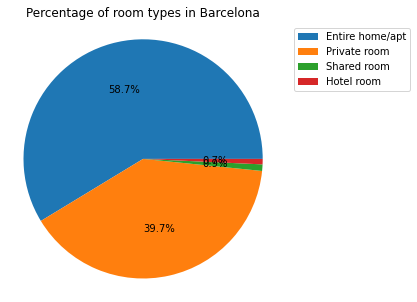

In [17]:
df = airbnbb['room_type'].value_counts().plot(kind = 'pie', autopct='%1.1f%%', radius = 1.1, legend = True, labeldistance = None, ylabel = '', title = 'Percentage of room types in Barcelona', figsize = (5,5))
df.legend(bbox_to_anchor=(1.5, 1), loc='upper right')
plt.show()

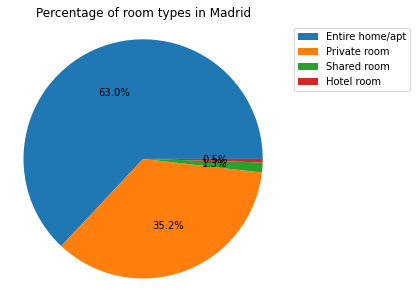

In [18]:
df = airbnbm['room_type'].value_counts().plot(kind = 'pie', autopct='%1.1f%%', radius = 1.1, legend = True, labeldistance = None, ylabel = '', title = 'Percentage of room types in Madrid', figsize = (5,5))
df.legend(bbox_to_anchor=(1.5, 1), loc='upper right')
plt.show()

We can see that the sum of rates of Shared and Hotel rooms is almost the same for Barcelona and Madrid (the ratio of Shared rooms in Madrid is greater than the corresponding percentage in Barcelona) and remains low on the total number of airbnbs in general.

We also see that the Entire house/apartment rate in Madrid is 4.3% higher than the corresponding rate in Barcelona. On the other hand, the Private room rate in Madrid is 4.5% lower than the corresponding rate in Barcelona.

In [19]:
airbnbb.neighbourhood_group.value_counts(ascending=False)

Eixample               6575
Ciutat Vella           4357
Sants-Montjuïc         1902
Sant Martí             1639
Gràcia                 1571
Sarrià-Sant Gervasi     894
Horta-Guinardó          525
Les Corts               369
Sant Andreu             279
Nou Barris              210
Name: neighbourhood_group, dtype: int64

Find and make a bar chart with the number of airbnbs by neighbourhood. The neighbourhoods with the most airbnb accommodations are located in the city center (Eixample, Ciutat Vella, Sants-Montjuïc, Sant Martí), which makes sense since visitors and tourists to the city will want to be close to most of the city's shops, activities, etc.

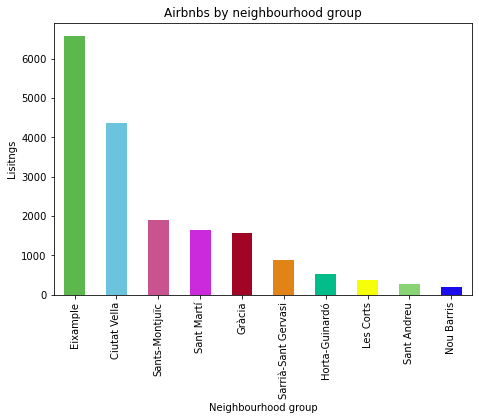

In [20]:
airbnbb['neighbourhood_group'].value_counts().plot(kind = 'bar', color=['#5cb84c','#6bc3de','#c9538f', '#cb2adc', '#a10425', '#e28317', '#02bc8a', '#f6ff07', '#88d374', '#1b0cee'], figsize = (7.5,5))
plt.title('Airbnbs by neighbourhood group')
plt.xlabel('Neighbourhood group')
plt.ylabel('Lisitngs')
plt.show()

Find top 5 hosts by the number of the listings and top 5 hosts by the sum of the price of the listings of each host.

In [21]:
airbnbb.host_name.value_counts(ascending=False).nlargest(5)

Ukio                      318
Enter                     271
SweetInn                  231
AB Apartment Barcelona    179
Acomodis Apartments       174
Name: host_name, dtype: int64

In [22]:
airbnbb.groupby('host_name')['price'].sum().nlargest(5)

host_name
Eric                      59268.0
ONA Hotels                46000.0
Ukio                      43597.0
Acomodis Apartments       41781.0
AB Apartment Barcelona    37139.0
Name: price, dtype: float64

As we can see from the results, 3 of the hosts are in both top 5. This could mean that hosts who have the highest prices for their rooms or/and have the most rooms doesn't necessarily have the most listings for their rooms.

Next, we want to see if there are more short-term or long-term rentals. From the bar graph below we can conclude that airbnb's tendency is to be short term, with 1-5 minimum nights per accommodation. However, there are also many rooms/apartments that have a minimum stay of almost 30 nights. This is probably because hosts want to protect their rooms and are looking for more guests who stay longer.

In [23]:
import numpy as np

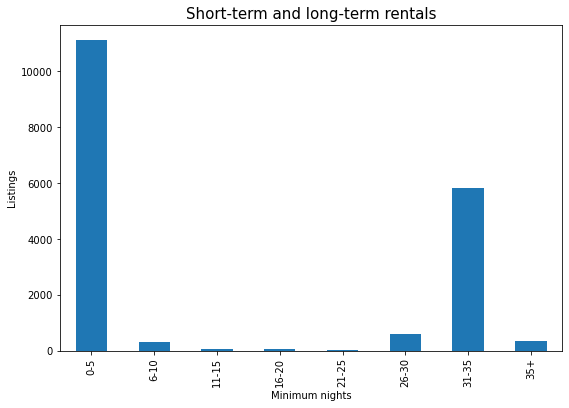

In [24]:
airbnbb["min_nights_grp"] = pd.cut(airbnbb.minimum_nights, [0, 5, 10, 15, 20, 25, 30, 35, np.inf])
labels = ["0-5", "6-10", "11-15", "16-20", "21-25", "26-30", "31-35", "35+"]
airbnbb["min_nights_grp"] = airbnbb["min_nights_grp"].cat.rename_categories(labels)
x = airbnbb.groupby('min_nights_grp').size().plot(kind = 'bar', title = 'Short-term and long-term rentals', xlabel = 'Minimum nights', ylabel = 'Listings', figsize = (9, 6))
x.title.set_size(15)
plt.show()

We want to compare the mean price of each room type in Barcelona and Madrid.

In [25]:
airbnbb.groupby('room_type')['price'].mean()

room_type
Entire home/apt    141.944211
Hotel room         156.943548
Private room        97.090228
Shared room         68.250000
Name: price, dtype: float64

In [26]:
airbnbm.groupby('room_type')['price'].mean()

room_type
Entire home/apt    155.709053
Hotel room         223.754237
Private room        81.437994
Shared room        100.023881
Name: price, dtype: float64

In [27]:
airbnbb['price'].mean()

126.49408320876931

In [28]:
airbnbm['price'].mean()

129.1570001611084

From the results above, we can see that, except for private rooms, the average prices are lower in Barcelona. This is something that we might have expected, beacause Madrid is the capital of Spain. However, rents may also be high in Barcelona because it is an important cultural centre and a major tourist destination and there is a greater demand for accommodation there.

As we can see below the maximum price of a room/apartment is quite higher in Barcelona compared to Madrid.

In [36]:
airbnbb['price'].max()

56815.0

In [37]:
airbnbm['price'].max()

21000

We can display some basic stats for all the numeric columns.

The mean price is almost 126.5€, but from the std (standard deviation), which is 548.5€, we can conclude that values are more spread out.

In [31]:
airbnbb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.832100e+04,1.832100e+04,18321.000000,18321.000000,16056.000000,18321.000000,18321.000000,18321.000000,18321.000000,18321.000000,18321.000000
mean,3.370245e+17,1.723186e+08,41.391914,2.166945,126.494083,14.865892,43.864309,1.098999,33.812838,171.187381,11.819933
std,4.184948e+17,1.766263e+08,0.014042,0.017454,548.481873,31.514680,89.887244,1.764162,66.230543,136.551292,23.855482
min,1.747500e+04,3.073000e+03,41.352720,2.085593,9.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.239606e+07,1.023157e+07,41.381010,2.156690,50.000000,1.000000,1.000000,0.020000,1.000000,13.000000,0.000000
50%,4.638623e+07,1.038178e+08,41.389521,2.168030,87.000000,3.000000,7.000000,0.380000,5.000000,176.000000,2.000000
75%,8.064681e+17,3.289379e+08,41.401320,2.177490,130.000000,31.000000,44.000000,1.650000,29.000000,310.000000,15.000000
max,1.045480e+18,5.496387e+08,41.459560,2.227710,56815.000000,1124.000000,1941.000000,67.300000,318.000000,365.000000,1065.000000


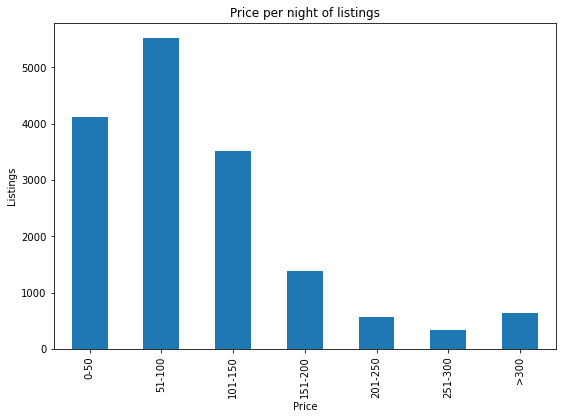

In [32]:
airbnbb["price_grp"] = pd.cut(airbnbb.price, [0, 50, 100, 150, 200, 250, 300, np.inf])
labels = ["0-50", "51-100", "101-150", "151-200", "201-250", "251-300", ">300"]
airbnbb["price_grp"] = airbnbb["price_grp"].cat.rename_categories(labels)
x = airbnbb.groupby('price_grp').size().plot(kind = 'bar', title = 'Price per night of listings', xlabel = 'Price', ylabel = 'Listings', figsize = (9, 6))
plt.show()

From the bar graph above we can see that the most listings cost <100€, but there are also a lot of listings that cost 100€-200€ and fewer, but a significant number, of listings that cost more than 200€.